<a href="https://colab.research.google.com/github/RandiBro234/Analisis-Sentimen-with-Machine-Learning-Approach/blob/main/Analisis_Sentimen_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Session 1: Upload dan lihat struktur dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("Instagram Comments Scraping.csv")
print("Shape:", df.shape)
print("Kolom:", list(df.columns))
print(df.head(300))


Saving Instagram Comments Scraping.csv to Instagram Comments Scraping (2).csv
Shape: (316, 4)
Kolom: ['Username', 'Like_Count', 'Created_At', 'Comment']
            Username  Like_Count        Created_At  \
0       jendamclover         964   10/12/2025 5:01   
1           a.apink_           0  10/12/2025 16:34   
2        ggfc.cepogo           0  10/12/2025 16:33   
3      auliaasmulnst           0  10/12/2025 11:08   
4    wong.ora.kanggo           0  10/12/2025 11:07   
..               ...         ...               ...   
295          m_irido           0  10/16/2025 16:46   
296        ririn_408           0  10/16/2025 12:59   
297      haenurtimah           0  10/16/2025 10:56   
298        baliyau__           1   10/16/2025 5:11   
299  ahmadfirdaus_72           2  10/15/2025 23:27   

                                               Comment  
0      Kemarin rasanya piala dunia sudah di depan mata  
1                                           out petrik  
2                          

In [13]:
# Session 2: Deteksi kolom teks paling mungkin (comment/text/content)
possible_text_cols = [c for c in df.columns if any(k in c.lower() for k in ("comment","koment","text","isi","content","caption"))]
if len(possible_text_cols) == 0:
    print("Tidak menemukan kolom teks otomatis. Silakan ganti 'text_col' manual sesuai dataset.")
    print("Kolom tersedia:", list(df.columns))
    text_col = input("Masukkan nama kolom yang berisi komentar: ")
else:
    text_col = possible_text_cols[0]
    print("Terpilih kolom teks:", text_col)

# Periksa beberapa contoh
print(df[text_col].head(20))


Terpilih kolom teks: Comment
0       Kemarin rasanya piala dunia sudah di depan mata
1                                            out petrik
2                                           #patrickout
3     Posisi bang? @arya.m.sinulingga kok gak nampak...
4     ERICK THOHIR ANJING,, KLUIVERT BABI,, BUBARKAN...
5     ERICK THOHIR ANJING,, KLUIVERT BABI,, BUBARKAN...
6                  Patrik P nya PETOAKKKKK #KluivertOut
7     Kalian HEBAT!!! Sampai disini itu sudah sangat...
8     Info seleksi piala aff pa,manawi tiasa abi hyn...
9                                           #patrickout
10               Terima kasih sudah pernah sedekat ini.
11    WWKKWKW CAPE CAPE COCH @shintaeyong7777 naikin...
12                                          #patrickout
13                                          #patrickout
14             Tolong suruh angkat kaki skarang juga 🫵🏻
15                                          #PatrickOut
16                                          erik kontol
17                 

In [31]:
# Session 3: Preprocessing teks
import re

def clean_text(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\.\S+', ' ', s)    # hapus URL
    s = re.sub(r'[^a-z0-9\s]', ' ', s)        # hapus simbol (tetap angka jika perlu)
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['clean_text'] = df[text_col].apply(clean_text)
print(df[['clean_text']].head(300))


                                            clean_text
0      kemarin rasanya piala dunia sudah di depan mata
1                                           out petrik
2                                           patrickout
3    posisi bang arya m sinulingga kok gak nampak a...
4    erick thohir anjing kluivert babi bubarkan pss...
..                                                 ...
295  stop naturalisasi mending pakai lokal saja kal...
296                          cape bangettt gegara eric
297                                                   
298  ganti erick tohirnya aja dia pebisnis bukan or...
299  jgn nonton pertandingan timnas klo masih di la...

[300 rows x 1 columns]


In [32]:
# Session 4: Rule-based labeling (Indonesian lexicon sederhana)
# NOTE: Ini lexicon minimal untuk percobaan; kamu bisa tambah kata sesuai domain/data.
positive_words = {
    "bagus","enak","mantap","suka","recommended","baik","nyaman","recommended","puas","bagus","keren","mantap",
    "love","lezat","sempurna","murah","cepat","great","hebat","luar biasa","NT","nice try","nt","terimakasih","terima kasih",
    "respect"
}
negative_words = {
    "buruk","jelek","masalah","kecewa","worst","parah","lama","mahal","ga","gak","tidak","tidaknya","tidaklah",
    "bangke","menyebalkan","bete","horek","anjing","babi","out","kontol","menghancurkan", "angkat kaki","patrickout","petrik",
    "kluivertout","patrickkluivertout","gagal","taek"
}

def lexicon_score(s):
    toks = s.split()
    score = 0
    for t in toks:
        if t in positive_words: score += 1
        if t in negative_words: score -= 1
    return score

# Hitung score dan tentukan label 3 kelas: 'pos','neu','neg'
df['lex_score'] = df['clean_text'].apply(lexicon_score)
def map_label(score):
    if score > 0: return 'positive'
    if score < 0: return 'negative'
    return 'neutral'

df['auto_sentiment'] = df['lex_score'].apply(map_label)

# Tampilkan distribusi label buatan
print("Distribusi label (automatis):")
print(df['auto_sentiment'].value_counts())
print(df[['clean_text','lex_score','auto_sentiment']].head(300))


Distribusi label (automatis):
auto_sentiment
neutral     203
negative     92
positive     21
Name: count, dtype: int64
                                            clean_text  lex_score  \
0      kemarin rasanya piala dunia sudah di depan mata          0   
1                                           out petrik         -2   
2                                           patrickout         -1   
3    posisi bang arya m sinulingga kok gak nampak a...         -1   
4    erick thohir anjing kluivert babi bubarkan pss...         -2   
..                                                 ...        ...   
295  stop naturalisasi mending pakai lokal saja kal...          0   
296                          cape bangettt gegara eric          0   
297                                                             0   
298  ganti erick tohirnya aja dia pebisnis bukan or...          0   
299  jgn nonton pertandingan timnas klo masih di la...         -2   

    auto_sentiment  
0          neutral  
1         

In [33]:
# Session 5: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text'].astype(str)
y_auto = df['auto_sentiment'].astype(str)

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_df=0.95)  # unigram+bigram, filter kata jarang
X_sparse = vectorizer.fit_transform(texts)

print("Shape TF-IDF:", X_sparse.shape)
print("Contoh fitur:", list(vectorizer.vocabulary_.keys())[:20])

# Buat dataframe kecil untuk verifikasi
tmp = df[['clean_text','auto_sentiment']].copy()


Shape TF-IDF: (316, 376)
Contoh fitur: ['piala', 'dunia', 'sudah', 'di', 'piala dunia', 'out', 'petrik', 'patrickout', 'arya', 'sinulingga', 'kok', 'gak', 'pas', 'timnas', 'kalah', 'ini', 'arya sinulingga', 'erick', 'thohir', 'anjing']


In [34]:
# Session 6: Split + SMOTE oversampling (SMOTE but needs dense arrays)
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

# Filter untuk memastikan setiap kelas minimal 2 contoh (jika ada kelas 1 contoh sangat kecil, SMOTE gagal)
vc = y_auto.value_counts()
print("Label counts before filtering:\n", vc)

mask = y_auto.map(vc) >= 1  # kita izinkan kelas 1 jika perlu — SMOTE memerlukan >=1? but we'll check later
X = X_sparse
y = y_auto.reset_index(drop=True)

# Split terlebih dahulu (stratify hanya jika setiap kelas >=2)
if (vc >= 2).all():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
else:
    # kalau ada kelas dengan 1 sampel saja, kita split tanpa stratify
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train/test sizes:", X_train.shape, X_test.shape)
print("Train label distrib:", Counter(y_train))
print("Test label distrib:", Counter(y_test))

# SMOTE memerlukan array dense; dataset biasanya kecil jadi ok to_dense
from imblearn.over_sampling import SMOTE

try:
    X_train_dense = X_train.toarray()
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_dense, y_train)
    print("After SMOTE distribution:", Counter(y_train_res))
except Exception as e:
    # Jika SMOTE gagal (mis. karena kelas dengan 1 contoh), fallback: RandomOverSampler
    print("SMOTE gagal:", e)
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
    # If ros returned sparse arrays, convert if necessary for some models
    print("After RandomOverSampler distribution:", Counter(y_train_res))


Label counts before filtering:
 auto_sentiment
neutral     203
negative     92
positive     21
Name: count, dtype: int64
Train/test sizes: (252, 376) (64, 376)
Train label distrib: Counter({'neutral': 162, 'negative': 73, 'positive': 17})
Test label distrib: Counter({'neutral': 41, 'negative': 19, 'positive': 4})
After SMOTE distribution: Counter({'neutral': 162, 'negative': 162, 'positive': 162})


In [35]:
# Session 7: Training & Evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Jika X_train_res masih dense numpy karena SMOTE, kita fine; kalau sparse (ros), handle accordingly.
# Pastikan bentuk X_test sesuai type model expect (dense/sparse). Many sklearn classifiers accept dense arrays.
try:
    # detect numpy array
    _ = X_train_res.shape
    X_train_final = X_train_res
except:
    X_train_final = X_train_res.toarray()

# For test, convert to dense if needed (some classifiers accept sparse)
X_test_final = X_test.toarray() if hasattr(X_test, "toarray") else X_test

models = {
    "NaiveBayes": MultinomialNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "LinearSVM": LinearSVC(),
    "RandomForest": RandomForestClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_final, y_train_res)
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision_macro": report['macro avg']['precision'],
        "Recall_macro": report['macro avg']['recall'],
        "F1_macro": report['macro avg']['f1-score']
    })
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

df_results = pd.DataFrame(results).sort_values(by='F1_macro', ascending=False)
print("\nPerbandingan model:")
print(df_results)



=== NaiveBayes ===
Accuracy: 0.546875
              precision    recall  f1-score   support

    negative       0.44      0.74      0.55        19
     neutral       0.75      0.44      0.55        41
    positive       0.38      0.75      0.50         4

    accuracy                           0.55        64
   macro avg       0.52      0.64      0.53        64
weighted avg       0.63      0.55      0.55        64

Confusion Matrix:
 [[14  5  0]
 [18 18  5]
 [ 0  1  3]]

=== LogisticRegression ===
Accuracy: 0.890625
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82        19
     neutral       0.87      0.98      0.92        41
    positive       1.00      0.75      0.86         4

    accuracy                           0.89        64
   macro avg       0.93      0.82      0.87        64
weighted avg       0.90      0.89      0.89        64

Confusion Matrix:
 [[14  5  0]
 [ 1 40  0]
 [ 0  1  3]]

=== LinearSVM ===
Accuracy: 0.875
     

In [37]:
# Session 8: Prediksi semua data (opsional) & ringkasan distribusi sentimen (menggunakan model terbaik)
best_model_name = df_results.iloc[0]['Model']
best_model = models[best_model_name]

# Prediksi terhadap seluruh dataset (gunakan vectorizer & best_model; pastikan format sama)
X_all = vectorizer.transform(df['clean_text'].astype(str))
X_all_final = X_all.toarray() if hasattr(X_all, "toarray") else X_all
df['predicted_sentiment'] = best_model.predict(X_all_final)

print("Distribusi prediksi model terbaik:")
print(df['predicted_sentiment'].value_counts(normalize=False))

# Contoh: tampil beberapa komentar yang diprediksi negative
print("\nBeberapa contoh komentar predicted NEGATIVE:")
print(df[df['predicted_sentiment']=='negative'][['clean_text']].head(300))


Distribusi prediksi model terbaik:
predicted_sentiment
neutral     208
negative     88
positive     20
Name: count, dtype: int64

Beberapa contoh komentar predicted NEGATIVE:
                                            clean_text
1                                           out petrik
2                                           patrickout
4    erick thohir anjing kluivert babi bubarkan pss...
5    erick thohir anjing kluivert babi bubarkan pss...
6                  patrik p nya petoakkkkk kluivertout
..                                                 ...
301                                kluivertout aryaout
302                                kluivertout aryaout
305                                        kluivertout
307                                             pk out
313  di bangun oleh sty dihancurkan oleh petrik sem...

[88 rows x 1 columns]


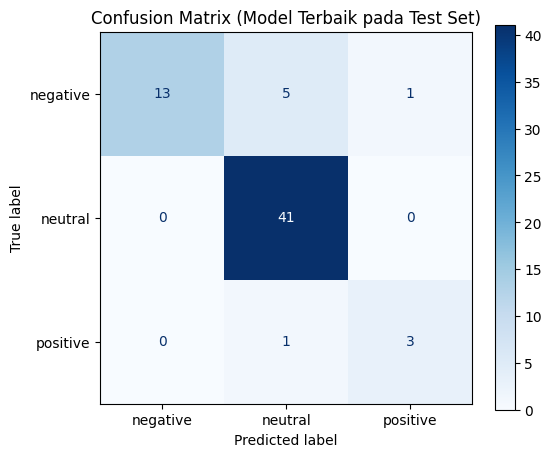


📊 Interpretasi:
- Angka diagonal = jumlah prediksi benar untuk setiap kelas.
- Angka luar diagonal = jumlah prediksi salah (misklasifikasi).
- Confusion matrix membantu melihat jenis kesalahan yang dibuat model (misalnya, seberapa sering sentimen negatif diprediksi sebagai netral).



In [43]:
# Session 9: Visualisasi Confusion Matrix Setelah Fine-Tuning
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Asumsi kamu sudah punya:
# y_test → label asli
# y_pred → hasil prediksi model terbaik di test set

# --- Hitung confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['negative', 'neutral', 'positive']) # Updated labels to match the actual class labels

# --- Plot dengan gaya yang mirip gambar kamu ---
fig, ax = plt.subplots(figsize=(6,5)) # Increased figure size for better readability
disp.plot(cmap='Blues', ax=ax, colorbar=True) # Changed cmap for variety
plt.title("Confusion Matrix (Model Terbaik pada Test Set)") # Updated title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# --- Analisis tambahan ---
print("""
📊 Interpretasi:
- Angka diagonal = jumlah prediksi benar untuk setiap kelas.
- Angka luar diagonal = jumlah prediksi salah (misklasifikasi).
- Confusion matrix membantu melihat jenis kesalahan yang dibuat model (misalnya, seberapa sering sentimen negatif diprediksi sebagai netral).
""")

In [48]:
# Session 10 Prediksi Contoh komentar baru
new_comments = [
    "STY IN",
    "BALIKIN STY",
    "Alex Pastoor jadi pelatih sementara oke sih",
    "Kluivert kebanyakan judol",
    "Semangat terus para pemain diaspora",
    "#patrickout",
    "nice try semua"
]

# Preprocessing sama seperti data training
new_clean = [clean_text(c) for c in new_comments]

# Transformasi ke bentuk TF-IDF (pakai vectorizer yang sudah dilatih)
new_tfidf = vectorizer.transform(new_clean)

# Prediksi sentimen (langsung output string)
new_pred = best_model.predict(new_tfidf)

# Tampilkan hasil
print("\n=== Hasil Prediksi Komentar Baru ===")
for comment, label in zip(new_comments, new_pred):
    print(f"{comment}\nSentimen: {label}\n")



=== Hasil Prediksi Komentar Baru ===
STY IN
Sentimen: neutral

BALIKIN STY
Sentimen: neutral

Alex Pastoor jadi pelatih sementara oke sih
Sentimen: neutral

Kluivert kebanyakan judol
Sentimen: negative

Semangat terus para pemain diaspora
Sentimen: neutral

#patrickout
Sentimen: negative

nice try semua
Sentimen: positive

